In [1]:
import numpy as np
import pandas as pd

# Tree-Based Algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Distance-Based Algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Deep Learning Architecture
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Data CLeaning and Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Evaluation
from sklearn import metrics

# For Reproducability
np.random.seed(0)

In [2]:
data = pd.read_csv('autos.csv')
data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
data.shape

(193, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [5]:
data.isnull().sum()

symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [6]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
data[cat_cols].head()

,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,engine_type,fuel_system
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


Inspecting the cardinality

In [7]:
data[cat_cols].nunique()

make               21
fuel_type           2
aspiration          2
body_style          5
drive_wheels        3
engine_location     2
engine_type         5
fuel_system         7
dtype: int64

Inspecting data consistency and entry errors

In [8]:
# def count_cats(df):
#     entries = {}
#     for col in df.columns:
#         entries[col] = df[col].unique()
#     return entries

def count_cats(df):
    entries = {col: df[col].unique() for col in df.columns}
    return entries

In [9]:
count_cats(data[cat_cols])

{'make': array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
        'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
        'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
        'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object),
 'fuel_type': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'body_style': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 'drive_wheels': array(['rwd', 'fwd', '4wd'], dtype=object),
 'engine_location': array(['front', 'rear'], dtype=object),
 'engine_type': array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object),
 'fuel_system': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype=object)}

In [10]:
data['make'].value_counts()

toyota           32
nissan           18
mitsubishi       13
honda            13
mazda            12
volkswagen       12
subaru           12
volvo            11
peugot           11
bmw               8
mercedes-benz     8
dodge             8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64

Separating the features and the target

In [11]:
X = data.drop('price', axis = 1)
y = data.price

In [12]:
encoder = LabelEncoder()

In [13]:
X = X.join(X[cat_cols].apply(encoder.fit_transform).add_suffix('_label'))

X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,city_mpg,highway_mpg,make_label,fuel_type_label,aspiration_label,body_style_label,drive_wheels_label,engine_location_label,engine_type_label,fuel_system_label
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,21,27,0,1,0,0,2,0,0,4
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,21,27,0,1,0,0,2,0,0,4
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,19,26,0,1,0,2,2,0,4,4
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,24,30,1,1,0,3,1,0,2,4
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,18,22,1,1,0,3,0,0,2,4


In [14]:
X = X.drop(cat_cols, axis = 1)
X.head()

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,city_mpg,highway_mpg,make_label,fuel_type_label,aspiration_label,body_style_label,drive_wheels_label,engine_location_label,engine_type_label,fuel_system_label
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,21,27,0,1,0,0,2,0,0,4
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,21,27,0,1,0,0,2,0,0,4
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,19,26,0,1,0,2,2,0,4,4
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,24,30,1,1,0,3,1,0,2,4
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,18,22,1,1,0,3,0,0,2,4


In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.23, random_state=0)

+ ### Without Scaling

DecisionTree

In [16]:
model_dt = DecisionTreeRegressor(random_state = 11)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=11)

In [17]:
preds_dt = model_dt.predict(X_valid)
mae = metrics.mean_absolute_error(preds_dt, y_valid)
print(f'MAE: {mae}')

MAE: 1631.3333333333333


RandomForest

In [18]:
model_rf = RandomForestRegressor(random_state = 11)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=11)

In [19]:
preds_rf = model_rf.predict(X_valid)
mae = metrics.mean_absolute_error(preds_rf, y_valid)
print(f'MAE: {mae}')

MAE: 1160.0818333333332


KNeighbors

In [20]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
preds_knn = model_knn.predict(X_valid)
mae = metrics.mean_absolute_error(preds_knn, y_valid)
print(f'MAE: {mae}')

MAE: 1931.031111111111


SupportVector

In [22]:
model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [23]:
preds_svr = model_svr.predict(X_valid)
mae = metrics.mean_absolute_error(preds_svr, y_valid)
print(f'MAE: {mae}')

MAE: 4757.036140561852


XGBoost

In [24]:
xgb = XGBRegressor()

In [25]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
preds_xgb = xgb.predict(X_valid)
mae = metrics.mean_absolute_error(preds_xgb, y_valid)
print(f'MAE: {mae}')

MAE: 1266.8962022569444


C:\Users\HP\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Deep Neural Network

In [27]:
X_train.shape

(148, 24)

In [28]:
model_nn = keras.Sequential([
    layers.Dense(244, activation = 'relu', input_shape = [24]),
    layers.Dense(244, activation = 'relu'),
    layers.Dense(244, activation = 'relu'),
    layers.Dense(1)
])

model_nn.compile(optimizer = 'adam', loss = 'mae')

In [29]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.01, 
    patience = 10,
    restore_best_weights = True
)

In [30]:
model_data = model_nn.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 28,
                      epochs = 500,
                      callbacks = [early_stopping],
                      verbose = 0
                      )

In [31]:
model_hist = model_data.history

model_hist = pd.DataFrame(model_hist)
model_hist.head()

,loss,val_loss
0,11738.075195,7934.218750
1,7167.170410,4729.018555
2,6069.562012,6050.263672
3,6005.678223,4555.686523
4,5503.510742,4466.869629


<AxesSubplot:>

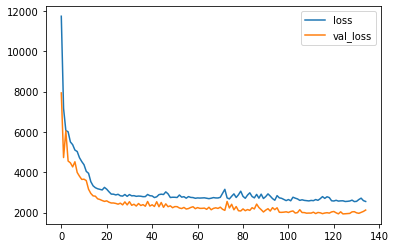

In [32]:
model_hist.plot()

In [33]:
model_nn_preds = model_nn.predict(X_valid)
mae = metrics.mean_absolute_error(model_nn_preds, y_valid)
print(f'Deep Neural Network MAE: {mae}')

Deep Neural Network MAE: 1932.2166232638888


## After Scaling

In [34]:
train = X_train.join(y_train)
valid = X_valid.join(y_valid)

train.head()

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,highway_mpg,make_label,fuel_type_label,aspiration_label,body_style_label,drive_wheels_label,engine_location_label,engine_type_label,fuel_system_label,price
89,2,2,95.1,162.4,63.8,53.3,2008,4,97,3.15,...,37,12,1,0,1,1,0,2,1,8249
61,-1,4,115.6,202.6,71.7,56.3,3770,5,183,3.58,...,25,9,0,1,3,2,0,2,2,31600
24,1,4,93.7,157.3,63.8,50.6,1989,4,90,2.97,...,38,4,1,0,3,1,0,2,1,6692
30,1,2,93.7,150.0,64.0,52.6,1837,4,79,2.91,...,42,5,1,0,2,1,0,2,0,5399
143,0,4,95.7,169.7,63.6,59.1,3110,4,92,3.05,...,32,18,1,0,4,0,0,2,1,8778


In [35]:
scaler = StandardScaler()

In [36]:
scaled_train = pd.DataFrame(scaler.fit_transform(train))
scaled_valid = pd.DataFrame(scaler.transform(valid))

scaled_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.948765,-1.161553,-0.610690,-0.917273,-0.976928,-0.249532,-1.043183,-0.450412,-0.779172,-0.634070,...,0.841347,0.026659,0.372104,-0.493657,-1.776867,-0.632082,-0.117041,-0.016609,-0.970714,-0.634183
1,-1.404596,0.860916,2.547371,2.153689,2.685221,1.008039,2.211434,0.624765,1.316180,0.910217,...,-0.854716,-0.487969,-2.687419,2.025697,0.480440,1.166920,-0.117041,-0.016609,-0.340601,2.190296
2,0.164311,0.860916,-0.826363,-1.306872,-0.976928,-1.381345,-1.078279,-0.450412,-0.949724,-1.280515,...,0.982685,-1.345681,0.372104,-0.493657,0.480440,-0.632082,-0.117041,-0.016609,-0.970714,-0.822514
3,0.164311,-1.161553,-0.826363,-1.864535,-0.884215,-0.542965,-1.359040,-0.450412,-1.217734,-1.495997,...,1.548040,-1.174139,0.372104,-0.493657,-0.648213,-0.632082,-0.117041,-0.016609,-1.600826,-0.978912
4,-0.620142,0.860916,-0.518259,-0.359611,-1.069641,2.181772,0.992338,-0.450412,-0.900995,-0.993206,...,0.134654,1.055913,0.372104,-0.493657,1.609094,-2.431083,-0.117041,-0.016609,-0.970714,-0.570196


In [37]:
scaled_train.columns = train.columns
scaled_valid.columns = valid.columns

In [38]:
X_train = scaled_train.drop('price', axis = 1)
X_valid = scaled_valid.drop('price', axis = 1)

y_train = scaled_train.price
y_valid = scaled_valid.price

X_train.head(3)

,symboling,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,city_mpg,highway_mpg,make_label,fuel_type_label,aspiration_label,body_style_label,drive_wheels_label,engine_location_label,engine_type_label,fuel_system_label
0,0.948765,-1.161553,-0.610690,-0.917273,-0.976928,-0.249532,-1.043183,-0.450412,-0.779172,-0.634070,...,0.821730,0.841347,0.026659,0.372104,-0.493657,-1.776867,-0.632082,-0.117041,-0.016609,-0.970714
1,-1.404596,0.860916,2.547371,2.153689,2.685221,1.008039,2.211434,0.624765,1.316180,0.910217,...,-0.539644,-0.854716,-0.487969,-2.687419,2.025697,0.480440,1.166920,-0.117041,-0.016609,-0.340601
2,0.164311,0.860916,-0.826363,-1.306872,-0.976928,-1.381345,-1.078279,-0.450412,-0.949724,-1.280515,...,0.821730,0.982685,-1.345681,0.372104,-0.493657,0.480440,-0.632082,-0.117041,-0.016609,-0.970714


In [39]:
def train_eval_model(train_set, valid_set, model):
    X_train, y_train = train_set.drop('price', axis = 1), train_set.price
    X_valid, y_valid = valid_set.drop('price', axis = 1), valid_set.price
    
    if model == 'decisiontree':
        model = DecisionTreeRegressor(random_state = 0)
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        mae = metrics.mean_absolute_error(preds, y_valid)
        
    elif model == 'randomforest':
        model = RandomForestRegressor(random_state = 0)
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        mae = metrics.mean_absolute_error(preds, y_valid)
        
    elif model == 'xgb':
        model = XGBRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        mae = metrics.mean_absolute_error(preds, y_valid)
        
    elif model == 'svm':
        model = SVR()
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        mae = metrics.mean_absolute_error(preds, y_valid)
        
    elif model == 'knn':
        model = KNeighborsRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        mae = metrics.mean_absolute_error(preds, y_valid)
        
    else:
        print('Define a valid model')
        
    return f"{model}'s MAE: {mae}'"

In [40]:
train_eval_model(scaled_train, scaled_valid, 'decisiontree')

"DecisionTreeRegressor(random_state=0)'s MAE: 0.21140149773324787'"

In [41]:
train_eval_model(scaled_train, scaled_valid, 'randomforest')

"RandomForestRegressor(random_state=0)'s MAE: 0.14170239776793148'"

In [42]:
train_eval_model(scaled_train, scaled_valid, 'xgb')

C:\Users\HP\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


"XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n             importance_type='gain', interaction_constraints='',\n             learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n             min_child_weight=1, missing=nan, monotone_constraints='()',\n             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,\n             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n             tree_method='exact', validate_parameters=1, verbosity=None)'s MAE: 0.15005650002389034'"

In [43]:
train_eval_model(scaled_train, scaled_valid, 'knn')

"KNeighborsRegressor()'s MAE: 0.19899179329403946'"

In [44]:
train_eval_model(scaled_train, scaled_valid, 'svm')

"SVR()'s MAE: 0.23463134959462215'"

In [45]:
model_data = model_nn.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 28,
                      epochs = 500,
                      callbacks = [early_stopping],
                      verbose = 0
                      )

In [46]:
preds_nn = model_nn.predict(X_valid)
mae = metrics.mean_absolute_error(preds_nn, y_valid)
print(f"NN's MAE after scaling: {mae}")

NN's MAE after scaling: 0.22360824536631552


<AxesSubplot:>

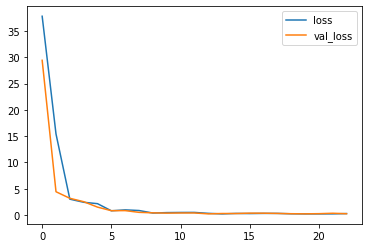

In [47]:
model_hist = pd.DataFrame(model_data.history)
model_hist.plot()